# Trust but Verify - Inspection of Large Image Collections

This notebook and accompanying [Python script characterize_data.py](characterize_data.py) illustrate the use of SimpleITK as a tool for efficient data inspection on large image collections, as part of familiarizing oneself with the data and performing cleanup prior to its use in deep learning or any other supervised machine learning approach.

The reasons for inspecting your data before using it include:
1. Identification of corrupt images.
2. Identification of erroneous images (label noise).
3. Assessment of data quality and variability in terms of intensity range, image resolution, and pixel types.
4. Reduction of workload, identifying redundant information content (e.g. a greyscale/single channel image masquerading as a color/three channel image - think x-ray in jpg file).


In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipympl
from DicomHelper import *

# utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data)
OUTPUT_DIR = "OUTPUT-ALL-UNLABELED"



In [2]:
%env SITK_SHOW_COMMAND /Applications/Slicer.app/Contents/MacOS/Slicer

env: SITK_SHOW_COMMAND=/Applications/Slicer.app/Contents/MacOS/Slicer


In [3]:
%matplotlib widget

In [4]:
data_root_dir = "/Users/seanreed/Documents/ALL-UNLABELED-DATA"

In [5]:
!ls $data_root_dir

1.2.276.0.2783747.3.1.2.1150183542.91496.1584557269.16654
1.2.276.0.2783747.3.1.2.1150183542.91496.1584560923.16663
1.2.276.0.7230010.3.1.2.1498839191.5144.1567777520.295
1.2.276.0.7230010.3.1.2.2733322860.4416.1572435955.336
1.2.276.0.7230010.3.1.2.738517100.4712.1625692712.6881
1.2.276.0.7230010.3.1.2.738517100.4712.1625694761.7821
1.2.276.0.7230010.3.1.2.738517100.4712.1625695650.8766
1.2.276.0.7230010.3.1.2.738517100.5904.1625697387.543
1.2.276.0.7230010.3.1.2.738517100.7560.1611692908.810
1.2.276.0.7230010.3.1.2.738517100.7560.1611699852.1756
1.2.392.200036.9116.2.2.2.1762671078.1544058796.778235
1.2.392.200036.9116.2.2.2.1762671078.1544062790.854133
1.2.392.200036.9116.2.2.2.1762671078.1544064007.853456
1.2.392.200036.9116.2.2.2.1762671078.1544065347.70543
1.2.392.200036.9116.2.2.2.1762671078.1544071914.125853
1.2.392.200036.9116.2.2.2.1762671078.1544074601.48209
1.2.392.200036.9116.2.2.2.1762671078.1544578457.236922
1.2.392.200036.9116.2.2.2.1762671078.1555384900.905993
1.2.392.

## Characterizing  image set

To characterize the image set we have written a [Python script](characterize_data.py) that you should run from the command line. This script is very flexible and allows you to robustly characterize your image set. Try the various options and learn more about your data. You'd be surprised how many times the data isn't what you thought it is when only relying on visual inspection. The script allows you to inspect your data both on a file by file basis and as DICOM series where an image (volume) is stored in multiple files.

DICOM series:
```
python characterize_data.py data output/DICOM_image_data_report.csv per_series \
--metadata_keys "0008|0060" "0018|5101" --metadata_keys_headings "modality" "radiographic view"  
```


After characterizing the image set we turn to visual inspection. 

In [ ]:
!python characterize_data.py --dir "/Users/seanreed/Documents/ALL-UNLABELED-DATA/1.2.276.0.7230010.3.1.2.1498839191.5144.1567777520.295" --output "./OUTPUT-ALL-UNLABELED/output_one_study.csv" --metadata_keys "0008|0060" "0018|5101" --metadata_keys_headings "modality" "radiographic view" 


In [11]:
!python characterize_data.py --dir $data_root_dir --output "./OUTPUT-ALL-UNLABELED/output_all_unlabeled.csv" --metadata_keys "0008|0060" "0018|5101" --metadata_keys_headings "modality" "radiographic view" 

args are 
 Namespace(analyze='per_series', dir='/Users/seanreed/Documents/ALL-UNLABELED-DATA', external_applications=[], external_applications_headings=[], imageIO='', metadata_keys=['0008|0060', '0018|5101'], metadata_keys_headings=['modality', 'radiographic view'], output='./OUTPUT-ALL-UNLABELED/output_all_unlabeled.csv')
ImageSeriesReader (0x7fc9bdb13000): Non uniform sampling or missing slices detected,  maximum nonuniformity:44.7

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:28.4194

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:47.5

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.9483

ImageSeriesReader (0x7fc9b9009060): Non uniform sampling or missing slices detected,  maximum nonuniformity:19.3538

ImageSeriesReader (0x7fc9bc4effd0): Non uniform sampling or missing slices detected,  maximum n

ImageSeriesReader (0x7fc9b7f2e480): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.4528

ImageSeriesReader (0x7fc9bdb3e5f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.22388

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.2

ImageSeriesReader (0x7fc9bdb63950): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.4328

ImageSeriesReader (0x7fc9bdb28730): Non uniform sampling or missing slices detected,  maximum nonuniformity:18

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.9167

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.63636

ImageSeriesReader (0x7fc9bdb39ae0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.8571

ImageSeriesReader (0x7fc9bde62f60): Non uniform sampling or missing slice

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:41.7692

ImageSeriesReader (0x7fc9bc4effd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:52.3333

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:1091.3

ImageSeriesReader (0x7fc9bc4f6510): Non uniform sampling or missing slices detected,  maximum nonuniformity:1106.18

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:129.075

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.8491

ImageSeriesReader (0x7fc9b9009650): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.8318

ImageSeriesReader (0x7fc9bdb40590): Non uniform sampling or missing slices detected,  maximum nonuniformity:28.8689

ImageSeriesReader (0x7fc9bdb64780): Non uniform sampling or missi

ImageSeriesReader (0x7fc9bdb3ffd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.2778

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.33333

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:4

ImageSeriesReader (0x7fc9bde609e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:59.8889

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.4348

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.8667

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:69

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.25

ImageSeriesReader (0x7fc9bc4effd0): Non uniform sampling or missing slices de

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:88.0909

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.1613

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.25

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.80851

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.6712

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.5238

ImageSeriesReader (0x7fc9bdb40590): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.9841

ImageSeriesReader (0x7fc9bdb3e590): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.36

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing s

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:31.9277

ImageSeriesReader (0x7fc9b7f299e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.72727

ImageSeriesReader (0x7fc9b90090d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.12308

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.42254

ImageSeriesReader (0x7fc9bdb1a7c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.6136

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:30.0926

ImageSeriesReader (0x7fc7c7006360): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.6613

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.3077

ImageSeriesReader (0x7fc9bc1c7750): Non uniform sampling or miss

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:25.9444

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.4146

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.2927

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.29577

ImageSeriesReader (0x7fc9bdb1a7c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.80575

ImageSeriesReader (0x7fc9b7f2ea90): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.95238

ImageSeriesReader (0x7fc9b7f2cd60): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.5714

ImageSeriesReader (0x7fc9bdb0aff0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.5055

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or miss

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.7692

ImageSeriesReader (0x7fc9bc1c7750): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.2113

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.3902

ImageSeriesReader (0x7fc9b900eaa0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.45455

ImageSeriesReader (0x7fc9bdb63950): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.4091

ImageSeriesReader (0x7fc9bc4effd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.25

ImageSeriesReader (0x7fc7c7004080): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.6

ImageSeriesReader (0x7fc9b7f0ef10): Non uniform sampling or missing slices detected,  maximum nonuniformity:6

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices 

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.68627

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.17857

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.35088

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:22.8

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:38.25

ImageSeriesReader (0x7fc9b90086b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:31.3333

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:26.5

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:30

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices de

ImageSeriesReader (0x7fc7c7004080): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.72917

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:28.619

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:28.619

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.4571

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.91489

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.05556

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.7442

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.1176

ImageSeriesReader (0x7fc7c7004080): Non uniform sampling or missin

ImageSeriesReader (0x7fc9bdb34af0): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.84466

ImageSeriesReader (0x7fc9bdb28730): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.3962

ImageSeriesReader (0x7fc7c7004080): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.6489

ImageSeriesReader (0x7fc9bdb39ae0): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.4516

ImageSeriesReader (0x7fc9bdb40590): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.0103

ImageSeriesReader (0x7fc9bdb615b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.5385

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.1667

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:44.625

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missi

ImageSeriesReader (0x7fc9bdb1a7c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:27.0092

ImageSeriesReader (0x7fc9bdb1a7c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.2828

ImageSeriesReader (0x7fc7c7004080): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.3764

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.8995

ImageSeriesReader (0x7fc9bdb38bc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.9333

ImageSeriesReader (0x7fc7c70044e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.5594

ImageSeriesReader (0x7fc9bc4f6510): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.9449

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.0763

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or miss

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:19.4

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.3333

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:26.1818

ImageSeriesReader (0x7fc9bdb67d40): Non uniform sampling or missing slices detected,  maximum nonuniformity:43.8462

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:35.6364

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:55.1667

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:22.625

ImageSeriesReader (0x7fc9bdb3e5f0): Non uniform sampling or missing slice

ImageSeriesReader (0x7fc9bdb1a7c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.90476

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:33.4667

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:35.2

ImageSeriesReader (0x7fc9bca14e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.8

ImageSeriesReader (0x7fc9bdb28730): Non uniform sampling or missing slices detected,  maximum nonuniformity:32.4615

ImageSeriesReader (0x7fc9bdb40000): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.0963

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.47247

ImageSeriesReader (0x7fc9bc1e4dc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.28571

ImageSeriesReader (0x7fc9b7f23890): Non uniform sampling or missing sli

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:35.4419

ImageSeriesReader (0x7fc7c70070a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.35849

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.9024

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.55556

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:17

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:25.9661

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.13483

ImageSeriesReader (0x7fc9bdb615b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.4545

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing s

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.9107

ImageSeriesReader (0x7fc9bc4effd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.96703

ImageSeriesReader (0x7fc9bc4f6570): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.55696

ImageSeriesReader (0x7fc9bdb1a7c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.3038

ImageSeriesReader (0x7fc9bc1e5990): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.375

ImageSeriesReader (0x7fc9bdb67d40): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.54701

ImageSeriesReader (0x7fc7c5704080): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.35

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:334.142

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing s

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:88.3636

ImageSeriesReader (0x7fc9bcada300): Non uniform sampling or missing slices detected,  maximum nonuniformity:44

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.4286

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.4

ImageSeriesReader (0x7fc9b7f2f3d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:24

ImageSeriesReader (0x7fc7c57055f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:82.4444

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:67.0244

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:77.0526

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices de

ImageSeriesReader (0x7fc9b7f2c230): Non uniform sampling or missing slices detected,  maximum nonuniformity:62.9091

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.8539

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.78161

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.0323

ImageSeriesReader (0x7fc9bca14e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.2411

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.7755

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.5714

ImageSeriesReader (0x7fc9bca1dc40): Non uniform sampling or missing slices detected,  maximum nonuniformity:230.2

ImageSeriesReader (0x7fc9bdb3c4b0): Non uniform sampling or missin

ImageSeriesReader (0x7fc9b7f31970): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.7528

ImageSeriesReader (0x7fc9b9012c10): Non uniform sampling or missing slices detected,  maximum nonuniformity:22.0732

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:53.8182

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:50.6667

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:8

ImageSeriesReader (0x7fc9b7f2ccc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:61.7143

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:45.1429

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:49.3333

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing sl

ImageSeriesReader (0x7fc9b7f2f430): Non uniform sampling or missing slices detected,  maximum nonuniformity:25

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:34.5

ImageSeriesReader (0x7fc9bc1c7750): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.7158

ImageSeriesReader (0x7fc9b7f0ef10): Non uniform sampling or missing slices detected,  maximum nonuniformity:2.85812

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:2.02927

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.96622

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.1646

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.15789

ImageSeriesReader (0x7fc9bdb64780): Non uniform sampling or missing slic

ImageSeriesReader (0x7fc9b9011520): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.66667

ImageSeriesReader (0x7fc9bdb28730): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.1176

ImageSeriesReader (0x7fc9bcadbb70): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.0635

ImageSeriesReader (0x7fc9bc1ccff0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.71233

ImageSeriesReader (0x7fc9b9012c60): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.26

ImageSeriesReader (0x7fc9bcadbb10): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.27692

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.396

ImageSeriesReader (0x7fc7d5f04080): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.9048

ImageSeriesReader (0x7fc9bdb38bc0): Non uniform sampling or missing

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.3438

ImageSeriesReader (0x7fc9b7f2ec20): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.71429

ImageSeriesReader (0x7fc7d5f04080): Non uniform sampling or missing slices detected,  maximum nonuniformity:43.6364

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.2915

ImageSeriesReader (0x7fc9bc1ccff0): Non uniform sampling or missing slices detected,  maximum nonuniformity:27.1154

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.125

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.72727

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:35.4545

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missi

ImageSeriesReader (0x7fc9bdb1a7c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.8671

ImageSeriesReader (0x7fc9bdb74060): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.9695

ImageSeriesReader (0x7fc7d5f06050): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.8912

ImageSeriesReader (0x7fc9b7f2ccc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.1368

ImageSeriesReader (0x7fc7d5f04e30): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.4563

ImageSeriesReader (0x7fc9b7f299b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:33.5455

ImageSeriesReader (0x7fc9bc1e4dc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:17

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.6309

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing s

ImageSeriesReader (0x7fc9bdb74060): Non uniform sampling or missing slices detected,  maximum nonuniformity:1.3625

ImageSeriesReader (0x7fc9bdb74060): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.12308

ImageSeriesReader (0x7fc9bdb28730): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.36842

ImageSeriesReader (0x7fc7d5f047a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.13636

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.43333

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:42.8421

ImageSeriesReader (0x7fc9b7f0ef10): Non uniform sampling or missing slices detected,  maximum nonuniformity:76.8889

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:40.9

ImageSeriesReader (0x7fc7d5f04080): Non uniform sampling or missing 

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:74.6364

ImageSeriesReader (0x7fc9b7f2f900): Non uniform sampling or missing slices detected,  maximum nonuniformity:24.125

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:58.5714

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:24

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.2857

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.5

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:46.25

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.1239

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices d

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.48276

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.78947

ImageSeriesReader (0x7fc9bdb0d390): Non uniform sampling or missing slices detected,  maximum nonuniformity:22.6299

ImageSeriesReader (0x7fc7d5f04080): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.0301

ImageSeriesReader (0x7fc7d5f04080): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.9

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:59.4

ImageSeriesReader (0x7fc9bdb1a7f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.40476

ImageSeriesReader (0x7fc9b9011d20): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.4

ImageSeriesReader (0x7fc9bdb54030): Non uniform sampling or missing slices

ImageSeriesReader (0x7fc9b9012d80): Non uniform sampling or missing slices detected,  maximum nonuniformity:91.9245

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:50.8235

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:64.2456

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:64.8421

ImageSeriesReader (0x7fc7d5f04080): Non uniform sampling or missing slices detected,  maximum nonuniformity:17

ImageSeriesReader (0x7fc9bdb40c30): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.8626

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.92593

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.33548

ImageSeriesReader (0x7fc7d5f04080): Non uniform sampling or missing sl

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:25.0909

ImageSeriesReader (0x7fc9bcada360): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.8824

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:22.5

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.3636

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:25.4167

ImageSeriesReader (0x7fc9bdb64d10): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.45

ImageSeriesReader (0x7fc9bdb3c4e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:31.0606

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.3509

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing s

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.8364

ImageSeriesReader (0x7fc9b7f0ef10): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.85714

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.77778

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.5833

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.8571

ImageSeriesReader (0x7fc7d5f04410): Non uniform sampling or missing slices detected,  maximum nonuniformity:21

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.25

ImageSeriesReader (0x7fc9b90142a0): Non uniform sampling or missing slices d

ImageSeriesReader (0x7fc7d5f053f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.2807

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.7273

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.4255

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:63.4091

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.6923

ImageSeriesReader (0x7fc9bdb40590): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.3571

ImageSeriesReader (0x7fc9bca1aee0): Non uniform sampling or missing slices detected,  maximum nonuniformity:28.7032

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.3505

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or miss

ImageSeriesReader (0x7fc7d5f05b00): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.5246

ImageSeriesReader (0x7fc9bdb34ac0): Non uniform sampling or missing slices detected,  maximum nonuniformity:48.6

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:43

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:50.5

ImageSeriesReader (0x7fc9bdb54030): Non uniform sampling or missing slices detected,  maximum nonuniformity:2.09543

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.56311

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing slices detected,  maximum nonuniformity:355.837

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:352.376

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices 

ImageSeriesReader (0x7fc9bdb3c4b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.4286

ImageSeriesReader (0x7fc9bde21880): Non uniform sampling or missing slices detected,  maximum nonuniformity:33.0526

ImageSeriesReader (0x7fc9b90125b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:59.3333

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:74.5714

ImageSeriesReader (0x7fc9bdb0b030): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.68831

ImageSeriesReader (0x7fc9bdb766e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.1304

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:22.7664

ImageSeriesReader (0x7fc9bdb0aff0): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.1795

ImageSeriesReader (0x7fc9bcada300): Non uniform sampling or miss

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.5227

ImageSeriesReader (0x7fc9bca14e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.1892

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:25.8679

ImageSeriesReader (0x7fc7d5f04080): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.3684

ImageSeriesReader (0x7fc9bdb3e5f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.2812

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.375

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.9091

ImageSeriesReader (0x7fc9bdb727a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.90909

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missin

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.58182

ImageSeriesReader (0x7fc9bc1ccff0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.2642

ImageSeriesReader (0x7fc9b7f2d470): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.40741

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:19.6

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.1935

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.8167

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.66

ImageSeriesReader (0x7fc9bc4f6540): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.9783

ImageSeriesReader (0x7fc9bdb66460): Non uniform sampling or missing sl

ImageSeriesReader (0x7fc9bc4fbbf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.2462

ImageSeriesReader (0x7fc9bdb1a7f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:105.73

ImageSeriesReader (0x7fc7b8a04080): Non uniform sampling or missing slices detected,  maximum nonuniformity:54

ImageSeriesReader (0x7fc9baee52f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:103.304

ImageSeriesReader (0x7fc9bca1dc40): Non uniform sampling or missing slices detected,  maximum nonuniformity:138.474

ImageSeriesReader (0x7fc9bc1d3e10): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.1897

ImageSeriesReader (0x7fc9bc1e9d90): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.825



## Now we look at our data using the DICOM series based approach.

After selecting our images of interest we print the associated files. Notice that for the series based approach for some images there is a single file association and for some multiple files.

In [7]:
### unlabeled data
data_root_dir = "/Users/seanreed/Documents/ALL-UNLABELED-DATA"

In [8]:
faux_series_volume_file_name = os.path.join(OUTPUT_DIR, "faux_series_volume.pkl")
faux_series_file_list_name = os.path.join(OUTPUT_DIR, "faux_series_file_list.pkl")
faux_volume_image_files, image_file_list = visualize_series(
    data_root_dir, projection_axis=2, thumbnail_size=[64, 64], tile_size=[5, 5]
)
with open(faux_series_volume_file_name, "wb") as fp:
    pickle.dump(faux_volume_image_files, fp)
with open(faux_series_file_list_name, "wb") as fp:
    pickle.dump(image_file_list, fp)

GDCMSeriesFileNames (0x7fab515aa740): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab515aa740): No Series were found

GDCMSeriesFileNames (0x7fab4aa5b260): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab515aa740): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab515aa740): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

GDCMSeriesFileNames (0x7fab515aa740): No Series were found

GDCMSeriesFileNames (0x7fab5123fe70): No Series were found

ImageSeriesReader (0x7fab51215410): Non 

ImageSeriesReader (0x7fab515af660): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.1053

ImageSeriesReader (0x7fab52d35360): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.9041

ImageSeriesReader (0x7fab4e3b85e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:22.9608

ImageSeriesReader (0x7faaa750ec10): Non uniform sampling or missing slices detected,  maximum nonuniformity:22.2302

ImageSeriesReader (0x7fab515a8800): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.0299

ImageSeriesReader (0x7fab51264b60): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.8906

ImageSeriesReader (0x7fab49c943a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.9375

ImageSeriesReader (0x7faaa750e370): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.71014

ImageSeriesReader (0x7fab52d17ab0): Non uniform sampling or miss

ImageSeriesReader (0x7fab4e32c090): Non uniform sampling or missing slices detected,  maximum nonuniformity:39

ImageSeriesReader (0x7fab52d0cb60): Non uniform sampling or missing slices detected,  maximum nonuniformity:32.8333

ImageSeriesReader (0x7fab4e32c090): Non uniform sampling or missing slices detected,  maximum nonuniformity:44.6

ImageSeriesReader (0x7fab51225480): Non uniform sampling or missing slices detected,  maximum nonuniformity:61.7143

ImageSeriesReader (0x7fab52d18a60): Non uniform sampling or missing slices detected,  maximum nonuniformity:19.2727

ImageSeriesReader (0x7fab52d4bda0): Non uniform sampling or missing slices detected,  maximum nonuniformity:23

ImageSeriesReader (0x7fab52d36100): Non uniform sampling or missing slices detected,  maximum nonuniformity:40

ImageSeriesReader (0x7fab49c9c8a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:86.625

ImageSeriesReader (0x7fab515af660): Non uniform sampling or missing slices detected

ImageSeriesReader (0x7fab4e32c090): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.0556

ImageSeriesReader (0x7fab515af660): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.1622

ImageSeriesReader (0x7fab52d63cf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:24.1562

ImageSeriesReader (0x7fab515b2030): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.3019

ImageSeriesReader (0x7fab52d0f700): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.3205

ImageSeriesReader (0x7fab51242210): Non uniform sampling or missing slices detected,  maximum nonuniformity:34.2222

ImageSeriesReader (0x7fab4ff12210): Non uniform sampling or missing slices detected,  maximum nonuniformity:31.4545

ImageSeriesReader (0x7fab52d63cf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:35.8182

ImageSeriesReader (0x7faaa7511e70): Non uniform sampling or miss

ImageSeriesReader (0x7faaa7505290): Non uniform sampling or missing slices detected,  maximum nonuniformity:1.5868

ImageSeriesReader (0x7fab515b2030): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.33058

ImageSeriesReader (0x7fab4e3c0a70): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.14865

ImageSeriesReader (0x7faaa7510af0): Non uniform sampling or missing slices detected,  maximum nonuniformity:71.1304

ImageSeriesReader (0x7faaa7517640): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.9167

ImageSeriesReader (0x7faaa7511e70): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.75

ImageSeriesReader (0x7faaa75159d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:19

ImageSeriesReader (0x7fab52d63cf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11

ImageSeriesReader (0x7fab52d597d0): Non uniform sampling or missing slices de

ImageSeriesReader (0x7fab49c99990): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.37779

ImageSeriesReader (0x7faa7a405190): Non uniform sampling or missing slices detected,  maximum nonuniformity:1.37329

ImageSeriesReader (0x7fab515cc630): Non uniform sampling or missing slices detected,  maximum nonuniformity:1.37797

ImageSeriesReader (0x7faaed48c180): Non uniform sampling or missing slices detected,  maximum nonuniformity:60.6667

ImageSeriesReader (0x7faaed48b7a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:174.286

ImageSeriesReader (0x7faaa7509a30): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.7181

ImageSeriesReader (0x7faaa75146d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.7838

ImageSeriesReader (0x7faaa75080b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.7438

ImageSeriesReader (0x7fab49ca26a0): Non uniform sampling or miss

ImageSeriesReader (0x7fab515efd60): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.2237

ImageSeriesReader (0x7faaa75107f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.046

ImageSeriesReader (0x7faa7d604080): Non uniform sampling or missing slices detected,  maximum nonuniformity:33.5333

ImageSeriesReader (0x7fab515d9da0): Non uniform sampling or missing slices detected,  maximum nonuniformity:19.2667

ImageSeriesReader (0x7faaed4acdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:47.5556

ImageSeriesReader (0x7faaa75a2f40): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.1

ImageSeriesReader (0x7fab49cd4f00): Non uniform sampling or missing slices detected,  maximum nonuniformity:10

ImageSeriesReader (0x7faaed4acdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.03448

ImageSeriesReader (0x7fab515d27a0): Non uniform sampling or missing slice

ImageSeriesReader (0x7fab512fa2f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.6897

ImageSeriesReader (0x7fab49ca26a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.4337

ImageSeriesReader (0x7fab54228d60): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.506

ImageSeriesReader (0x7faaed4acdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.29897

ImageSeriesReader (0x7faaed4b7c80): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.9

ImageSeriesReader (0x7fab515e3460): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.28481

ImageSeriesReader (0x7fab515efd60): Non uniform sampling or missing slices detected,  maximum nonuniformity:38.8

ImageSeriesReader (0x7faaed4acdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:42.8

ImageSeriesReader (0x7faaed4acdd0): Non uniform sampling or missing slices

ImageSeriesReader (0x7faaa75a8640): Non uniform sampling or missing slices detected,  maximum nonuniformity:128.053

ImageSeriesReader (0x7faaa7509650): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.83117

ImageSeriesReader (0x7faaed48bcc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.5152

ImageSeriesReader (0x7fab515fd3e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.41176

ImageSeriesReader (0x7fab515d2fc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:65.2

ImageSeriesReader (0x7faaed48bcc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:35.4

ImageSeriesReader (0x7fab515f0330): Non uniform sampling or missing slices detected,  maximum nonuniformity:37

ImageSeriesReader (0x7faaed47cd30): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.25

ImageSeriesReader (0x7faaed47cd30): Non uniform sampling or missing slices de

ImageSeriesReader (0x7fab515da910): Non uniform sampling or missing slices detected,  maximum nonuniformity:37.2105

ImageSeriesReader (0x7faaed483c20): Non uniform sampling or missing slices detected,  maximum nonuniformity:35.5769

ImageSeriesReader (0x7faaed47d7c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:42.1429

ImageSeriesReader (0x7faaed4bb750): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.1905

ImageSeriesReader (0x7faaed485f50): Non uniform sampling or missing slices detected,  maximum nonuniformity:26.3281

ImageSeriesReader (0x7faaed4767c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:106

ImageSeriesReader (0x7faaed4767c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:64.1538

ImageSeriesReader (0x7faaed483c20): Non uniform sampling or missing slices detected,  maximum nonuniformity:31.2857

ImageSeriesReader (0x7faaed4bb750): Non uniform sampling or missing 

ImageSeriesReader (0x7faaed47fe20): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.7885

ImageSeriesReader (0x7faaed4767c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.6

ImageSeriesReader (0x7faaed47fe20): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.6479

ImageSeriesReader (0x7fab515cee10): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.94872

ImageSeriesReader (0x7faaed47fe20): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.3939

ImageSeriesReader (0x7faaa7505110): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.1176

ImageSeriesReader (0x7fab49ce11a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.6316

ImageSeriesReader (0x7fab515e94f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.83333

ImageSeriesReader (0x7faaed47fe20): Non uniform sampling or missing

ImageSeriesReader (0x7fab515d2e70): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.8413

ImageSeriesReader (0x7faaed476b20): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.9846

ImageSeriesReader (0x7fab515fa420): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.5833

ImageSeriesReader (0x7fab515d6bf0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.33333

ImageSeriesReader (0x7fab512f95f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.8571

ImageSeriesReader (0x7fab515d2e70): Non uniform sampling or missing slices detected,  maximum nonuniformity:28.3

ImageSeriesReader (0x7fab515fa420): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.4444

ImageSeriesReader (0x7faaa7525560): Non uniform sampling or missing slices detected,  maximum nonuniformity:67.3333

ImageSeriesReader (0x7fab515fa420): Non uniform sampling or missing

ImageSeriesReader (0x7fab515db690): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.33333

ImageSeriesReader (0x7fa98731aa10): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.3333

ImageSeriesReader (0x7fab49ce0ae0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.67374

ImageSeriesReader (0x7fab512f95f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.5833

ImageSeriesReader (0x7fab512f95f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.4667

ImageSeriesReader (0x7faaa751bab0): Non uniform sampling or missing slices detected,  maximum nonuniformity:42.6078

ImageSeriesReader (0x7fab515db690): Non uniform sampling or missing slices detected,  maximum nonuniformity:35.6364

ImageSeriesReader (0x7fab49c949d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:42

ImageSeriesReader (0x7fab49ce0e40): Non uniform sampling or missing s

ImageSeriesReader (0x7fab49ce11a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:55.75

ImageSeriesReader (0x7faaed476e80): Non uniform sampling or missing slices detected,  maximum nonuniformity:34.7647

ImageSeriesReader (0x7fab52d6c170): Non uniform sampling or missing slices detected,  maximum nonuniformity:62.5

ImageSeriesReader (0x7faaed409f80): Non uniform sampling or missing slices detected,  maximum nonuniformity:78.6

ImageSeriesReader (0x7fa9873194a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:29.1

ImageSeriesReader (0x7fab512ff460): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.7048

ImageSeriesReader (0x7faaa7546b70): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.4717

ImageSeriesReader (0x7fab515f8fe0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.83951

ImageSeriesReader (0x7faaa751f4f0): Non uniform sampling or missing slices 

ImageSeriesReader (0x7fab52d1d750): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.03448

ImageSeriesReader (0x7faaa7514a30): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.85714

ImageSeriesReader (0x7fa97fd17c80): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.9268

ImageSeriesReader (0x7fab512a35f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.58491

ImageSeriesReader (0x7fab515d2e70): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.97674

ImageSeriesReader (0x7fa97fd35110): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.2857

ImageSeriesReader (0x7fab515fa610): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.8571

ImageSeriesReader (0x7fab515d4500): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.3235

ImageSeriesReader (0x7fab49cee4e0): Non uniform sampling or miss

ImageSeriesReader (0x7fab515f18e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.6667

ImageSeriesReader (0x7faaa7555800): Non uniform sampling or missing slices detected,  maximum nonuniformity:196.714

ImageSeriesReader (0x7fab515e2bc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:60.6923

ImageSeriesReader (0x7fa97fd117d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:70

ImageSeriesReader (0x7fab52d43850): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.9806

ImageSeriesReader (0x7fab515d77e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.4595

ImageSeriesReader (0x7fab515e2bc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.4

ImageSeriesReader (0x7fab52d43850): Non uniform sampling or missing slices detected,  maximum nonuniformity:37.3333

ImageSeriesReader (0x7faaa7555c40): Non uniform sampling or missing slic

ImageSeriesReader (0x7fab515dcc10): Non uniform sampling or missing slices detected,  maximum nonuniformity:19.0602

ImageSeriesReader (0x7fab49ceeb50): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.9114

ImageSeriesReader (0x7faaa75088b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.4861

ImageSeriesReader (0x7fab515edc80): Non uniform sampling or missing slices detected,  maximum nonuniformity:2.24814

ImageSeriesReader (0x7fab512ff7e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.975

ImageSeriesReader (0x7fab515fe450): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.0482

ImageSeriesReader (0x7faaa75088b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.4667

ImageSeriesReader (0x7fab49ceae10): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.0588

ImageSeriesReader (0x7fab512fe720): Non uniform sampling or missin

ImageSeriesReader (0x7fab49ce5020): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.6667

ImageSeriesReader (0x7faaa7562760): Non uniform sampling or missing slices detected,  maximum nonuniformity:17.3182

ImageSeriesReader (0x7fab49cddad0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.5312

ImageSeriesReader (0x7fa97fd17bd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.0465

ImageSeriesReader (0x7fab515fe7b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:20.7

ImageSeriesReader (0x7fa97fd84b60): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.8115

ImageSeriesReader (0x7fab515fe450): Non uniform sampling or missing slices detected,  maximum nonuniformity:40.3636

ImageSeriesReader (0x7fa97fd84b60): Non uniform sampling or missing slices detected,  maximum nonuniformity:66

ImageSeriesReader (0x7fa97fd6d6c0): Non uniform sampling or missing slic

ImageSeriesReader (0x7fa97fd3e5a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.34783

ImageSeriesReader (0x7fa97fd84d50): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.48387

ImageSeriesReader (0x7fab52d43850): Non uniform sampling or missing slices detected,  maximum nonuniformity:122.7

ImageSeriesReader (0x7fa97fd84d50): Non uniform sampling or missing slices detected,  maximum nonuniformity:46.5

ImageSeriesReader (0x7fa97fd3e5a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:34.6667

ImageSeriesReader (0x7fa97fd85200): Non uniform sampling or missing slices detected,  maximum nonuniformity:32.1429

ImageSeriesReader (0x7fab515fe7b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:76.4444

ImageSeriesReader (0x7fab52d43850): Non uniform sampling or missing slices detected,  maximum nonuniformity:68.7273

ImageSeriesReader (0x7fab52d43850): Non uniform sampling or missing s

ImageSeriesReader (0x7fab515d98a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.8846

ImageSeriesReader (0x7fa97fd48af0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.11321

ImageSeriesReader (0x7fa97fd38630): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.4286

ImageSeriesReader (0x7fab515ea3e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.2821

ImageSeriesReader (0x7fa97fd80a10): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.8031

ImageSeriesReader (0x7fab52d43850): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.2034

ImageSeriesReader (0x7fa97fd80a10): Non uniform sampling or missing slices detected,  maximum nonuniformity:38.3269

ImageSeriesReader (0x7fab515d4500): Non uniform sampling or missing slices detected,  maximum nonuniformity:25

ImageSeriesReader (0x7fa97fd80a10): Non uniform sampling or missing s

ImageSeriesReader (0x7fa97fd6d6c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:50.6

ImageSeriesReader (0x7fa97fd19e50): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.66667

ImageSeriesReader (0x7fab515d3810): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.33846

ImageSeriesReader (0x7fa97fd20950): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.19048

ImageSeriesReader (0x7fab49cee040): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.63636

ImageSeriesReader (0x7fa97fd20950): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.2917

ImageSeriesReader (0x7fab49cc9880): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.79747

ImageSeriesReader (0x7fa97fda3c10): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.2558

ImageSeriesReader (0x7fab515d3810): Non uniform sampling or missing

ImageSeriesReader (0x7fa97fd9c0e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:36.5172

ImageSeriesReader (0x7fab515d3810): Non uniform sampling or missing slices detected,  maximum nonuniformity:54.4444

ImageSeriesReader (0x7fa97fd1f140): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.03704

ImageSeriesReader (0x7fab515f54f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.84

ImageSeriesReader (0x7fab515d0560): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.01887

ImageSeriesReader (0x7fa97fd48af0): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.38019

ImageSeriesReader (0x7fa97fdf64c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.8172

ImageSeriesReader (0x7fab515d3810): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.4765

ImageSeriesReader (0x7fab49cc8e40): Non uniform sampling or missing

ImageSeriesReader (0x7fa97fd9c0e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.2899

ImageSeriesReader (0x7fab515d14d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.1205

ImageSeriesReader (0x7fab515d83b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:80.4

ImageSeriesReader (0x7fa97fd9c0e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:54

ImageSeriesReader (0x7fa97fd4c4f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:60.5

ImageSeriesReader (0x7fa97fd4c4f0): Non uniform sampling or missing slices detected,  maximum nonuniformity:100.154

ImageSeriesReader (0x7fab515fa980): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.25

ImageSeriesReader (0x7faaa751f6b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.6923

ImageSeriesReader (0x7fa97fd48af0): Non uniform sampling or missing slices det

ImageSeriesReader (0x7faaa7514a30): Non uniform sampling or missing slices detected,  maximum nonuniformity:384.153

ImageSeriesReader (0x7fa97fd8d7a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:384.161

ImageSeriesReader (0x7fab515d14d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.6435

ImageSeriesReader (0x7fa97fd49e60): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.2558

ImageSeriesReader (0x7fa97fd3e180): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.3295

ImageSeriesReader (0x7faaa7541e80): Non uniform sampling or missing slices detected,  maximum nonuniformity:19.2209

ImageSeriesReader (0x7fab515d4500): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.42857

ImageSeriesReader (0x7fab49ca03b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:0.526904

ImageSeriesReader (0x7fab515f6bb0): Non uniform sampling or mis

ImageSeriesReader (0x7fa97fdc22a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.4068

ImageSeriesReader (0x7fab515dc6b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.66019

ImageSeriesReader (0x7fab515f0f10): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.30918

ImageSeriesReader (0x7fab515d3810): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.5556

ImageSeriesReader (0x7fab515d3810): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.96667

ImageSeriesReader (0x7fa97fd23900): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.9579

ImageSeriesReader (0x7faaa754b330): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.34615

ImageSeriesReader (0x7fa97fdb6160): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.52174

ImageSeriesReader (0x7fa97fd8d7a0): Non uniform sampling or miss

ImageSeriesReader (0x7fab515fc080): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.3231

ImageSeriesReader (0x7fab515dbbd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.8333

ImageSeriesReader (0x7fa97fd9c0e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.35

ImageSeriesReader (0x7fab515f7a10): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.2727

ImageSeriesReader (0x7fab515f7a10): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.19048

ImageSeriesReader (0x7fab515f7a10): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.1765

ImageSeriesReader (0x7fa97fdc22a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.1624

ImageSeriesReader (0x7fa97fdb6240): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.51429

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing 

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:54.1304

ImageSeriesReader (0x7fa97fdac800): Non uniform sampling or missing slices detected,  maximum nonuniformity:40.9091

ImageSeriesReader (0x7fa97fda4fe0): Non uniform sampling or missing slices detected,  maximum nonuniformity:124.5

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:71.25

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:36.4286

ImageSeriesReader (0x7fa97fd9c0e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:59

ImageSeriesReader (0x7fa97fda4fe0): Non uniform sampling or missing slices detected,  maximum nonuniformity:16

ImageSeriesReader (0x7fa97fda4fe0): Non uniform sampling or missing slices detected,  maximum nonuniformity:26.3529

ImageSeriesReader (0x7fa97fd9c0e0): Non uniform sampling or missing slices det

ImageSeriesReader (0x7fab515f7a10): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.4192

ImageSeriesReader (0x7fa97fd74900): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.54545

ImageSeriesReader (0x7fa97fdac800): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.16667

ImageSeriesReader (0x7fa97fdac800): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.35294

ImageSeriesReader (0x7fab515f7a10): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.12857

ImageSeriesReader (0x7fa97fd74900): Non uniform sampling or missing slices detected,  maximum nonuniformity:29.9394

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.97059

ImageSeriesReader (0x7fa97fdac800): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.9429

ImageSeriesReader (0x7faaa75469b0): Non uniform sampling or miss

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.6316

ImageSeriesReader (0x7fab4aa61360): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.2

ImageSeriesReader (0x7fa97fd390a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:20

ImageSeriesReader (0x7fa97fdb6160): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.4

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.66667

ImageSeriesReader (0x7fa97fd33520): Non uniform sampling or missing slices detected,  maximum nonuniformity:6.87263

ImageSeriesReader (0x7fa97fd33520): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.31515

ImageSeriesReader (0x7faaa75a7440): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.48352

ImageSeriesReader (0x7fab515f0f10): Non uniform sampling or missing slices d

ImageSeriesReader (0x7fa97fdacb60): Non uniform sampling or missing slices detected,  maximum nonuniformity:12.6282

ImageSeriesReader (0x7fab52d61cb0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.4203

ImageSeriesReader (0x7fa97fd1acb0): Non uniform sampling or missing slices detected,  maximum nonuniformity:21.2519

ImageSeriesReader (0x7fa97fd4d2c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.65306

ImageSeriesReader (0x7fa97fd4d2c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.3333

ImageSeriesReader (0x7fa97fd74900): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.186

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.62745

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.08475

ImageSeriesReader (0x7fab515ffdd0): Non uniform sampling or missi

ImageSeriesReader (0x7fa97fd0d0e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.6

ImageSeriesReader (0x7fab49c98b60): Non uniform sampling or missing slices detected,  maximum nonuniformity:50.5714

ImageSeriesReader (0x7fa97fd223e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:24.5

ImageSeriesReader (0x7fa97fd30740): Non uniform sampling or missing slices detected,  maximum nonuniformity:47.8182

ImageSeriesReader (0x7fab52d6c4d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:32.8125

ImageSeriesReader (0x7fab515f6850): Non uniform sampling or missing slices detected,  maximum nonuniformity:24.8889

ImageSeriesReader (0x7fab52d6c4d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.84663

ImageSeriesReader (0x7fa97fd4d2c0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.51967

ImageSeriesReader (0x7fab515f0f10): Non uniform sampling or missing sli

ImageSeriesReader (0x7fa97fd15650): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.7273

ImageSeriesReader (0x7fa97fd1aab0): Non uniform sampling or missing slices detected,  maximum nonuniformity:5.18103

ImageSeriesReader (0x7fab52d61cb0): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.339

ImageSeriesReader (0x7fab52d61cb0): Non uniform sampling or missing slices detected,  maximum nonuniformity:4.94231

ImageSeriesReader (0x7fa97fd50230): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.08108

ImageSeriesReader (0x7fab52d6c4d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:28.2188

ImageSeriesReader (0x7fab52d6c4d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:424.054

ImageSeriesReader (0x7faaa755fbb0): Non uniform sampling or missing slices detected,  maximum nonuniformity:38.25

ImageSeriesReader (0x7fab49cad7c0): Non uniform sampling or missing

ImageSeriesReader (0x7fab52d61cb0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.3894

ImageSeriesReader (0x7fa97fd0d6d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:3.40426

ImageSeriesReader (0x7fa97fdeed40): Non uniform sampling or missing slices detected,  maximum nonuniformity:19.8932

ImageSeriesReader (0x7fab515d9200): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.8462

ImageSeriesReader (0x7fa97fda7a40): Non uniform sampling or missing slices detected,  maximum nonuniformity:34.125

ImageSeriesReader (0x7fab52d6c4d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:14.6667

ImageSeriesReader (0x7fa97fda1ab0): Non uniform sampling or missing slices detected,  maximum nonuniformity:25.65

ImageSeriesReader (0x7fa97fd94dc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:11.1969

ImageSeriesReader (0x7fa97fd62150): Non uniform sampling or missing

ImageSeriesReader (0x7faaa7544f60): Non uniform sampling or missing slices detected,  maximum nonuniformity:75

ImageSeriesReader (0x7fa97fdd1ad0): Non uniform sampling or missing slices detected,  maximum nonuniformity:38.1818

ImageSeriesReader (0x7fab49ca6e30): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.29032

ImageSeriesReader (0x7fab52d6c4d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.59

ImageSeriesReader (0x7fa97fd48400): Non uniform sampling or missing slices detected,  maximum nonuniformity:16.1124

ImageSeriesReader (0x7fa97fd223e0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.69

ImageSeriesReader (0x7faaa755fbb0): Non uniform sampling or missing slices detected,  maximum nonuniformity:13.2453

ImageSeriesReader (0x7faaa7568d00): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.48

ImageSeriesReader (0x7fa97fda76e0): Non uniform sampling or missing slices 

ImageSeriesReader (0x7faaa7545680): Non uniform sampling or missing slices detected,  maximum nonuniformity:23.122

ImageSeriesReader (0x7fab49cd7f50): Non uniform sampling or missing slices detected,  maximum nonuniformity:18.6111

ImageSeriesReader (0x7faaa7545680): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.59459

ImageSeriesReader (0x7fab52d61cb0): Non uniform sampling or missing slices detected,  maximum nonuniformity:9.90323

ImageSeriesReader (0x7fab49ca4cc0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.05556

ImageSeriesReader (0x7fa97fde6cd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:8.06897

ImageSeriesReader (0x7fa97fd2b1b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:15.661

ImageSeriesReader (0x7fa97fde6cd0): Non uniform sampling or missing slices detected,  maximum nonuniformity:10.9375

ImageSeriesReader (0x7fab515d9200): Non uniform sampling or missin

In [9]:
print(image_file_list[:2])
print(len(image_file_list))
for i, series in enumerate(image_file_list):
    print(f"series{i} has {len(series)} dicom files")

(['/Users/seanreed/Documents/ALL-UNLABELED-DATA/1.2.392.200036.9116.2.6.1.48.1211418735.1594171555.312518/1.2.392.200036.9116.2.6.1.48.1211418735.1594171864.271199.dcm'], ['/Users/seanreed/Documents/ALL-UNLABELED-DATA/1.2.392.200036.9116.2.6.1.48.1211418735.1594171555.312518/1.2.392.200036.9116.2.6.1.48.1211418735.1594172108.415366.dcm', '/Users/seanreed/Documents/ALL-UNLABELED-DATA/1.2.392.200036.9116.2.6.1.48.1211418735.1594171555.312518/1.2.392.200036.9116.2.6.1.48.1211418735.1594172108.997017.dcm', '/Users/seanreed/Documents/ALL-UNLABELED-DATA/1.2.392.200036.9116.2.6.1.48.1211418735.1594171555.312518/1.2.392.200036.9116.2.6.1.48.1211418735.1594172109.882660.dcm', '/Users/seanreed/Documents/ALL-UNLABELED-DATA/1.2.392.200036.9116.2.6.1.48.1211418735.1594171555.312518/1.2.392.200036.9116.2.6.1.48.1211418735.1594172113.965329.dcm', '/Users/seanreed/Documents/ALL-UNLABELED-DATA/1.2.392.200036.9116.2.6.1.48.1211418735.1594171555.312518/1.2.392.200036.9116.2.6.1.48.1211418735.1594172114.5

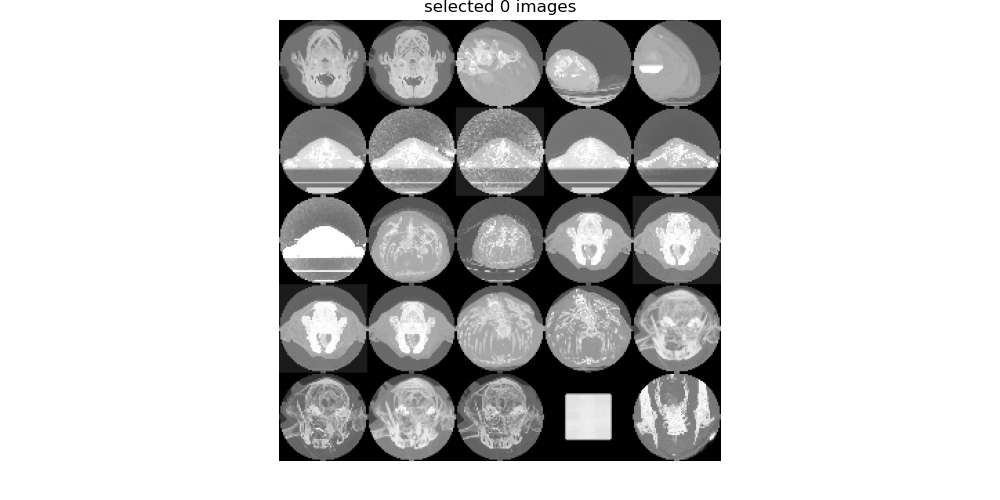

In [12]:
with open(faux_series_volume_file_name, "rb") as fp:
    faux_volume_image_files = pickle.load(fp)
with open(faux_series_file_list_name, "rb") as fp:
    image_file_list = pickle.load(fp)

try:
    image_selection_gui2 = ImageSelection(
        faux_volume_image_files,
        image_file_list,
        figure_size=(10, 5),
        selection_func=show_image,
    )
except Exception as e:
    print(e)

In [ ]:
selected_files = image_selection_gui2.get_selected_images()
print(selected_files)

In [14]:
!pwd

/Users/seanreed/PythonProjects/SimpleITK-Notebooks/Python
